In [1]:
import pandas as pd
from pandas import Series, DataFrame

In [2]:
titanic_df = pd.read_csv('titanic/train.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 1. 性別の分布

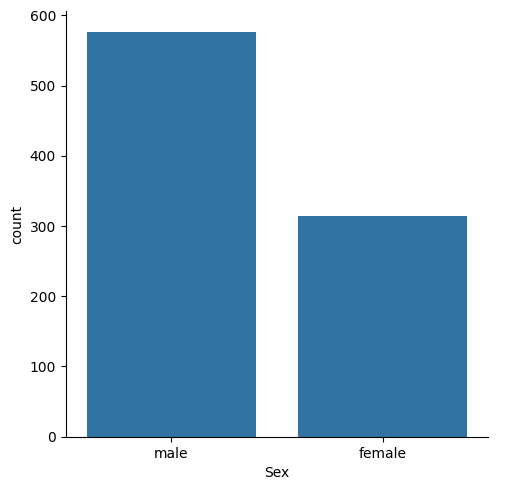

In [14]:
sns.catplot(data=titanic_df, x='Sex', kind='count')

### 2. 性別＊クラスの分布

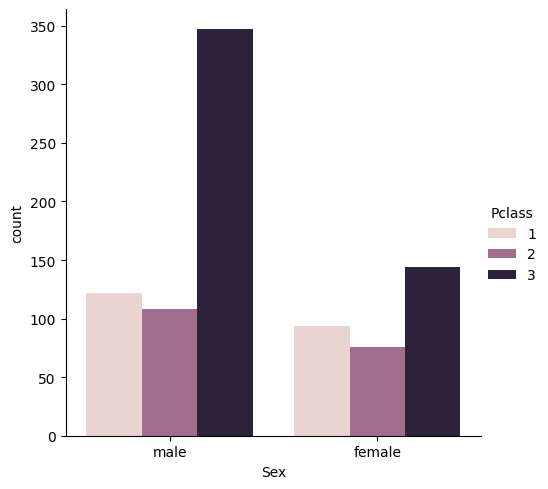

In [15]:
sns.catplot(data=titanic_df, x='Sex', hue='Pclass', kind='count')

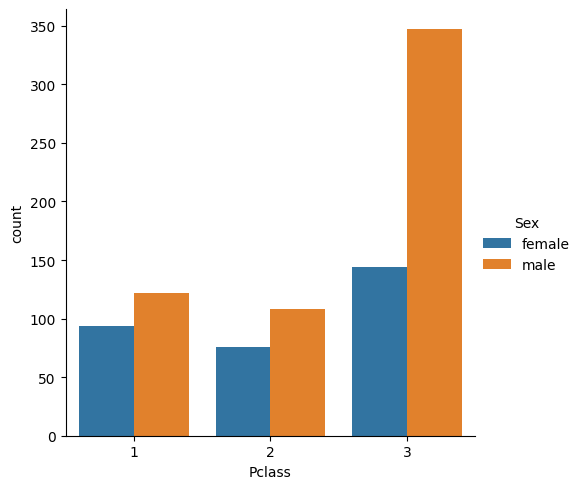

In [16]:
sns.catplot(data=titanic_df, x='Pclass', hue='Sex', kind='count')

### 3. 男性/女性/子供の列を新規作成

In [17]:
def male_female_child(passenger):
  age, sex = passenger
  return 'child' if age < 16 else sex

titanic_df['Person'] = titanic_df[['Age', 'Sex']].apply(male_female_child, axis=1)
titanic_df[['Age', 'Sex', 'Person']].head(10)

,Age,Sex,Person
0,22.0,male,male
1,38.0,female,female
2,26.0,female,female
3,35.0,female,female
4,35.0,male,male
5,NaN,male,male
6,54.0,male,male
7,2.0,male,child
8,27.0,female,female
9,14.0,female,child


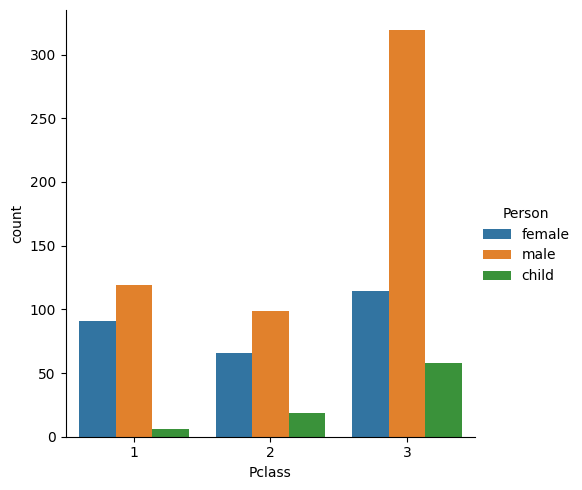

In [18]:
sns.catplot(data=titanic_df, x='Pclass', hue='Person', kind='count')

### 4. 年齢分布

<Axes: >

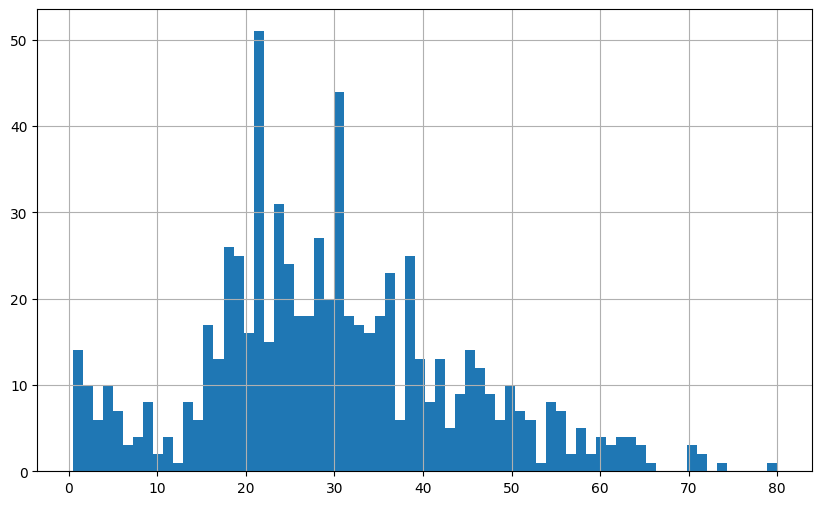

In [19]:
titanic_df['Age'].hist(bins=70, figsize=(10, 6))

In [20]:
print(f'Mean Age: {titanic_df['Age'].mean():.2f}')

Mean Age: 29.70


### 5. Personカラムの値カウント

In [21]:
print(titanic_df['Person'].value_counts())

Person
male      537
female    271
child      83
Name: count, dtype: int64


### 6. 性別ごとに年齢分布

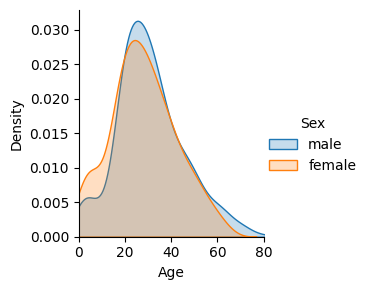

In [22]:
oldest = titanic_df['Age'].max()
fig = sns.FacetGrid(titanic_df, hue='Sex')
fig.map(sns.kdeplot, 'Age', fill=True)
fig.set(xlim=(0, oldest))
fig.add_legend()
plt.show()

### 7. Person毎

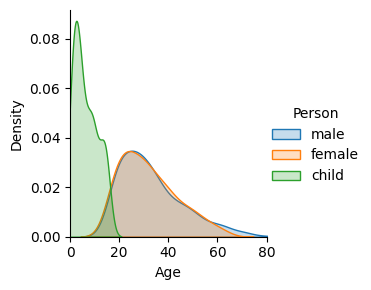

In [23]:
fig = sns.FacetGrid(titanic_df, hue='Person')
fig.map(sns.kdeplot, 'Age', fill=True)
fig.set(xlim=(0, oldest))
fig.add_legend()
plt.show()

### 8. クラスごと

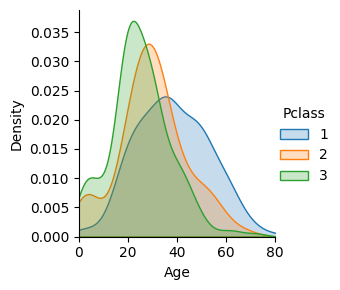

In [24]:
fig = sns.FacetGrid(titanic_df, hue='Pclass')
fig.map(sns.kdeplot, 'Age', fill=True)
fig.set(xlim=(0, oldest))
fig.add_legend()
plt.show()

### 9. Cabinの可視化

In [25]:
# Cabin列の欠損値の除外
deck = titanic_df['Cabin'].dropna()

In [26]:
#各Cabinの最初の文字を抽出
levels = [cabin[0] for cabin in deck]
cabin_df = pd.DataFrame(levels, columns=['Cabin'])
print(cabin_df['Cabin'].value_counts())

Cabin
C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: count, dtype: int64


/var/folders/rp/r7rm8rzn5mvdkpykf4c15d540000gn/T/ipykernel_2365/4139672606.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=cabin_df, x='Cabin', kind='count', palette='winter_r')


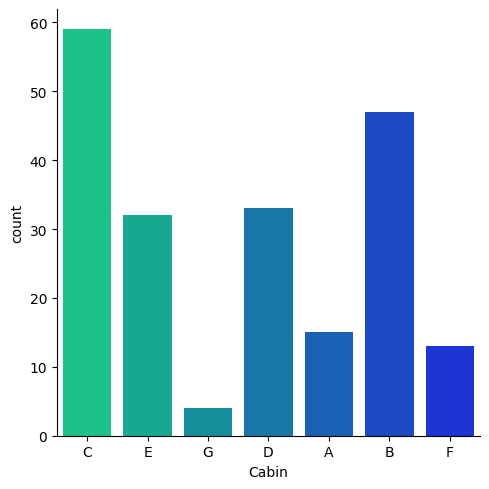

In [28]:
# 不明値の除外
cabin_df = cabin_df[cabin_df['Cabin'] != 'T']
sns.catplot(data=cabin_df, x='Cabin', kind='count', palette='winter_r')
plt.show()

### 10. Embarked別分布

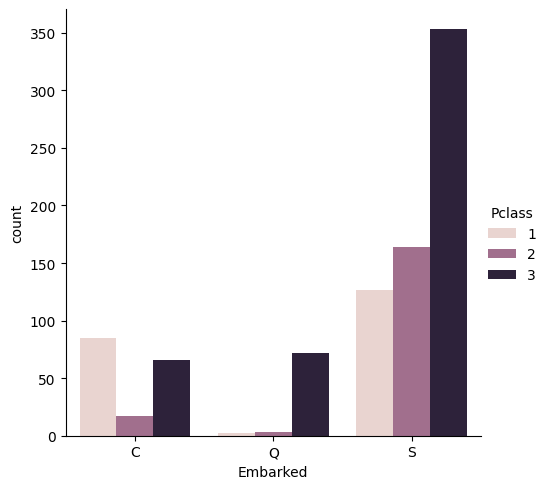

In [29]:
sns.catplot(
    x="Embarked",
    hue="Pclass",
    data=titanic_df,
    kind="count",
    order=["C", "Q", "S"],  # 順序を指定
)
plt.show()